In [1]:
# Example input matrix X (normalized values from the table)
import numpy as np
import pandas as pd
X = np.array([
    [-0.577, -0.864, -0.629, -0.719, 0.134, 0.818],
    [1.732, -0.890, -0.551, 1.715, -0.230, -0.719],
    [-0.577, 1.555, 1.731, -0.350, -1.352, -1.234],
    [-0.577, 0.199, -0.551, -0.645, 1.448, 1.135]
])

# Example weight matrix W (given in the table)
W = np.array([
    [0.12, -0.45, 0.88, -0.22, 0.78, 0.15],
    [-0.61, 0.29, -0.78, 0.04, 0.83, -0.16],
    [0.33, -0.72, 0.90, 0.18, 0.47, -0.11],
    [0.62, -0.36, -0.57, 0.89, -0.09, 0.72],
    [0.50, -0.14, -0.21, 0.68, 0.44, -0.77],
    [-0.85, 0.35, -0.19, 0.49, -0.63, 0.11]
]).T  # Transposed to match input dimensions

# Example bias vector b (given in the table)
b = np.array([0.15, -0.24, 0.31, -0.72, 0.49, -0.63])

# Perform the linear transformation: Y = X @ W + b
Y = X @ W + b

Y


array([[ 0.30144,  0.30361,  0.01915, -0.47118, -0.60527, -0.66919],
       [-0.39109, -1.1321 ,  1.30615,  2.01768,  3.21494, -1.40285],
       [-0.25837, -1.72598, -0.00481, -3.70251, -0.26241,  0.62033],
       [ 0.94792,  1.5939 , -0.07998, -0.72248, -0.38608, -1.06865]])

In [2]:
import pandas as pd
import numpy as np

# Small constant to avoid division by zero
delta = 1e-5

# Example feature matrix (assume Y is already provided)
df = pd.DataFrame(Y)

# Initialize dictionaries for normalized data and scaled/shifted data
normalized_data = {}
scaled_shifted_data = {}

# Define gamma (scale) and beta (shift) for each feature
# These can be initialized randomly or with specific values
gamma = {feature: 1.0 for feature in df.columns}  # Example: All scale factors are 1.0
beta = {feature: 0.0 for feature in df.columns}   # Example: All shift values are 0.0

for feature in df.columns:
    H = df[feature].values
    mu = np.mean(H)
    sigma = np.sqrt(delta + np.mean((H - mu) ** 2))
    normalized_data[feature] = (H - mu) / sigma

    # Apply scaling and shifting
    scaled_shifted_data[feature] = gamma[feature] * normalized_data[feature] + beta[feature]
    print(f"{feature}: {mu=}, {sigma=}, gamma={gamma[feature]}, beta={beta[feature]}")

# Create DataFrames for normalized and scaled/shifted values
normalized_df = pd.DataFrame(normalized_data)
scaled_shifted_df = pd.DataFrame(scaled_shifted_data)

# Display the scaled and shifted results to the user
print(scaled_shifted_df)


0: mu=np.float64(0.14997499999999997), sigma=np.float64(0.5289600274359113), gamma=1.0, beta=0.0
1: mu=np.float64(-0.2401425000000001), sigma=np.float64(1.2906122511501081), gamma=1.0, beta=0.0
2: mu=np.float64(0.31012750000000006), sigma=np.float64(0.5762243956296453), gamma=1.0, beta=0.0
3: mu=np.float64(-0.7196224999999999), sigma=np.float64(2.028066484072638), gamma=1.0, beta=0.0
4: mu=np.float64(0.49029500000000004), sigma=np.float64(1.5778617654043716), gamma=1.0, beta=0.0
5: mu=np.float64(-0.6300899999999999), sigma=np.float64(0.7672372315001403), gamma=1.0, beta=0.0
          0         1         2         3         4         5
0  0.286345  0.421314 -0.504973  0.122502 -0.694335 -0.050962
1 -1.022884 -0.691112  1.728532  1.349710  1.726796 -1.007198
2 -0.771977 -1.151266 -0.546554 -1.470804 -0.477041  1.629770
3  1.508517  1.421064 -0.677006 -0.001409 -0.555419 -0.571609


In [33]:
import pandas as pd
import numpy as np

# Small constant to avoid division by zero
delta = 1e-5

# Example feature matrix (assume Y is already provided)
df = pd.DataFrame(Y)

# Initialize dictionaries for normalized data and scaled/shifted data
normalized_data = {}
scaled_shifted_data = {}

# Define unique gamma (scale) and beta (shift) for each feature
# These can be initialized randomly or with specific values
gamma = {feature: np.random.uniform(0.5, 1.5) for feature in df.columns}  # Random scale factors
beta = {feature: np.random.uniform(-1.0, 1.0) for feature in df.columns}  # Random shift values

for feature in df.columns:
    H = df[feature].values
    mu = np.mean(H)
    sigma = np.sqrt(delta + np.mean((H - mu) ** 2))
    normalized_data[feature] = (H - mu) / sigma

    # Apply unique scaling and shifting
    scaled_shifted_data[feature] = gamma[feature] * normalized_data[feature] + beta[feature]
    print(f"{feature}: {mu=}, {sigma=}, gamma={gamma[feature]}, beta={beta[feature]}")

# Create DataFrames for normalized and scaled/shifted values
normalized_df = pd.DataFrame(normalized_data)
scaled_shifted_df = pd.DataFrame(scaled_shifted_data)

# Display the scaled and shifted results to the user
print(scaled_shifted_df)


0: mu=np.float64(0.14997499999999997), sigma=np.float64(0.5289600274359113), gamma=0.9523207609381628, beta=0.6740618945497125
1: mu=np.float64(-0.2401425000000001), sigma=np.float64(1.2906122511501081), gamma=0.9238090512247757, beta=0.4798346794985424
2: mu=np.float64(0.31012750000000006), sigma=np.float64(0.5762243956296453), gamma=1.4488933260475712, beta=-0.18634117178885923
3: mu=np.float64(-0.7196224999999999), sigma=np.float64(2.028066484072638), gamma=0.9999455218891956, beta=-0.6507961444911954
4: mu=np.float64(0.49029500000000004), sigma=np.float64(1.5778617654043716), gamma=0.9218509014156092, beta=-0.48669323687063604
5: mu=np.float64(-0.6300899999999999), sigma=np.float64(0.7672372315001403), gamma=1.2317505341593744, beta=0.9226083758243546
          0         1         2         3         4         5
0  0.946754  0.869048 -0.917993 -0.528301 -1.126767  0.859836
1 -0.300052 -0.158621  2.318118  0.698841  1.105155 -0.318009
2 -0.061108 -0.583715 -0.978239 -2.121520 -0.926

In [32]:
import pandas as pd
import numpy as np

# Assuming scaled_shifted_df is the DataFrame containing the scaled and shifted data
# Define the ELU activation function with alpha parameter
def elu(x, alpha=1.0):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

# Apply ELU activation to each column of the DataFrame
alpha = 1.0  # You can change this based on your requirements
elu_df = scaled_shifted_df.map(lambda x: elu(x, alpha))

# Display the ELU-applied DataFrame
print(elu_df)


          0         1         2         3         4         5
0  0.384782  1.312476 -0.512450 -0.279354  0.583666  0.814915
1 -0.669198 -0.182337  2.622936  0.494959  1.801032  0.285173
2 -0.559783 -0.562850 -0.541854 -0.752306  0.692924  1.746018
3  1.776653  2.672930 -0.623080 -0.336789  0.653514  0.526483


In [4]:
def apply_dropout(dataframe, dropout_rate=0.5):
    # Generate a random mask with the same shape as the DataFrame
    mask = np.random.rand(*dataframe.shape) > dropout_rate
    # Apply the mask and scale the remaining values
    print(dataframe * mask)
    return dataframe * mask / (1 - dropout_rate)

# Step 2: Apply dropout
dropout_rate = 0.25  # Adjust this as needed
dropout_df = apply_dropout(elu_df, dropout_rate)

# Display the resulting DataFrame after ELU and dropout
print(dropout_df)

NameError: name 'elu_df' is not defined

In [76]:
import numpy as np

# Step 1: Data Setup
# True labels (one-hot encoded)
y_true = np.array([
    [0, 1, 0],  # True label for x1
    [1, 0, 0],  # True label for x2
    [0, 0, 1],  # True label for x3
    [0, 0, 1],  # True label for x4
    [0, 1, 0]   # True label for x5
])

# Predicted logits (before softmax)
logits = np.array([
    [1.23, 2.11, 0.87],  # Predictions for x1
    [0.91, 1.34, 0.76],  # Predictions for x2
    [1.45, 0.88, 2.31],  # Predictions for x3
    [1.07, 0.94, 1.56],  # Predictions for x4
    [0.78, 1.65, 0.94]   # Predictions for x5
])

# Step 2: Apply Softmax to Convert Logits to Probabilities
def softmax(logits):
    exp_logits = np.exp(logits)  # Subtract max for numerical stability
    # print(exp_logits)
    su = np.sum(exp_logits, axis=1, keepdims=True)
    # print(su)
    probabilities = exp_logits / su
    return probabilities

# Compute softmax probabilities
probabilities = softmax(logits)
# print(probabilities)

# Step 3: Compute Cross-Entropy Loss
def cross_entropy_loss(y_true, probabilities):
    # Select the probabilities corresponding to the true labels
    true_probs = np.sum(y_true * probabilities, axis=1)
    # print(true_probs)
    # Compute the negative log of these probabilities
    log_loss = -np.log(true_probs)
    # Return the mean loss across all examples
    print(log_loss)
    return np.mean(log_loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(y_true, probabilities)

# Print the results
# print("Softmax Probabilities:")
# print(probabilities)
print("\nCross-Entropy Loss:")
print(loss)


[0.5330765  1.22317687 0.50830505 0.76573331 0.6474151 ]

Cross-Entropy Loss:
0.7355413679599727


In [103]:
import numpy as np

# Softmax function
def softmax(logits):
    exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
    return exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

# Entropy loss function
def entropy_loss(probabilities, lambda_weight=0.1):
    # Compute entropy: -sum(p * log(p))
    entropy = -np.sum(probabilities * np.log(probabilities), axis=1)
    # print(np.log(probabilities))
    print(-np.sum(probabilities * np.log(probabilities), axis=1))
    # Avoid log(0) with 1e-12
    print(np.mean(entropy))
    return lambda_weight * np.mean(entropy)

# Compute probabilities (softmax)
probabilities = softmax(logits)

# Compute entropy loss
lambda_weight = 0.1
loss = entropy_loss(probabilities, lambda_weight)

print("Probabilities:", probabilities)
print("Entropy Loss:", loss)


[0.95782674 1.06663775 0.933053   1.06040507 1.02088774]
1.007762058965028
Probabilities: [[0.24339333 0.58679691 0.16980976]
 [0.29429375 0.45240528 0.25330098]
 [0.25453802 0.14394773 0.60151425]
 [0.28486688 0.2501403  0.46499282]
 [0.21927797 0.52339696 0.25732508]]
Entropy Loss: 0.10077620589650281


In [190]:
import numpy as np
import pandas as pd


# Creating the numpy array based on the table provided
data = np.array([
    [0.384, 1.312, -0.718, -0.327, 0.583, 0.814],  # x1
    [-1.106, -0.201, 2.622, 0.494, 1.801, 0.285],  # x2
    [-0.820, -0.827, -0.780, -1.395, 0.692, 1.746],  # x3
    [1.776, 2.672, -0.975, -0.410, 0.653, 0.526],  # x4
    [0.632, 1.242, -0.394, 0.434, 0.465, 0.696],  # x5
    [-0.316, 0.182, 2.387, 0.765, 1.569, 0.052],  # x6
    [-0.699, -1.783, -1.642, -1.676, 0.185, 1.903],  # x7
    [1.321, 1.965, -0.242, -0.522, 0.686, -0.186],  # x8
])

k = 3

# Step 1: Initialize centroids randomly (from data points)
np.random.seed(1213)  # For reproducibility
initial_indices = np.random.choice(data.shape[0], k, replace=False)
centroids = data[initial_indices]
# print(centroids)

# Function to compute Euclidean distance
def compute_distances(data, centroids):
    distances = np.zeros((data.shape[0], k))
    for i, centroid in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - centroid, axis=1)
    return distances

# Iterative K-means clustering
max_iterations = 2
for iteration in range(max_iterations):
    # Step 2: Compute distances and assign clusters
    distances = compute_distances(data, centroids)
    # print(distances.T)

    cluster_assignments = np.argmin(distances, axis=1)
    # print(cluster_assignments)

    # Step 3: Update centroids
    new_centroids = np.array([data[cluster_assignments == i].mean(axis=0) for i in range(k)])
    # print(new_centroids)

    # Check for convergence
    if np.allclose(centroids, new_centroids):
        break
    centroids = new_centroids

# Prepare final results for display
cluster_table = pd.DataFrame(data, columns=[f"z_{i+1}" for i in range(data.shape[1])])
cluster_table["Cluster"] = cluster_assignments + 1  # Clusters 1-indexed

centroid_table = pd.DataFrame(centroids, columns=[f"z_{i+1}" for i in range(data.shape[1])])
centroid_table["Cluster"] = range(1, k + 1)  # Clusters 1-indexed

# Display the results
print(centroid_table)
print(cluster_table)

       z_1      z_2      z_3      z_4      z_5     z_6  Cluster
0 -0.71100 -0.00950  2.50450  0.62950  1.68500  0.1685        1
1  1.02825  1.79775 -0.58225 -0.20625  0.59675  0.4625        2
2 -0.75950 -1.30500 -1.21100 -1.53550  0.43850  1.8245        3
     z_1    z_2    z_3    z_4    z_5    z_6  Cluster
0  0.384  1.312 -0.718 -0.327  0.583  0.814        2
1 -1.106 -0.201  2.622  0.494  1.801  0.285        1
2 -0.820 -0.827 -0.780 -1.395  0.692  1.746        3
3  1.776  2.672 -0.975 -0.410  0.653  0.526        2
4  0.632  1.242 -0.394  0.434  0.465  0.696        2
5 -0.316  0.182  2.387  0.765  1.569  0.052        1
6 -0.699 -1.783 -1.642 -1.676  0.185  1.903        3
7  1.321  1.965 -0.242 -0.522  0.686 -0.186        2


In [192]:
from scipy.optimize import linear_sum_assignment

# Updated Frequency Matrix based on the provided image
frequency_matrix = np.array([
    [2, 0, 0],  # C1 overlaps with Ĉ1, Ĉ2, Ĉ3
    [1, 1, 2],  # C2 overlaps with Ĉ1, Ĉ2, Ĉ3
    [0, 0, 3],  # C3 overlaps with Ĉ1, Ĉ2, Ĉ3
])

# Step 1: Convert to cost matrix (maximize overlap by minimizing cost)
max_value = np.max(frequency_matrix)
cost_matrix = max_value - frequency_matrix
print(cost_matrix)

# Step 2: Apply Kuhn-Munkres (Hungarian algorithm) using linear_sum_assignment
row_indices, col_indices = linear_sum_assignment(cost_matrix)

# Step 3: Prepare the results
assignments = list(zip(row_indices + 1, col_indices + 1))  # Clusters 1-indexed

# Output the updated frequency matrix, cost matrix, and assignments
frequency_df = pd.DataFrame(
    frequency_matrix,
    index=["C1", "C2", "C3"],
    columns=["Ĉ1", "Ĉ2", "Ĉ3"]
)
cost_df = pd.DataFrame(
    cost_matrix,
    index=["C1", "C2", "C3"],
    columns=["Ĉ1", "Ĉ2", "Ĉ3"]
)



[[1 3 3]
 [2 2 1]
 [3 3 0]]


In [194]:
# Step-by-step demonstration of Kuhn-Munkres algorithm (Hungarian Algorithm)

steps = []  # To store each step for visualization

# Step 1: Subtract the row minimum
row_min = cost_matrix.min(axis=1)
step1_matrix = cost_matrix - row_min[:, np.newaxis]
steps.append(("Step 1: Subtract Row Minimum", step1_matrix))

# Step 2: Subtract the column minimum
col_min = step1_matrix.min(axis=0)
step2_matrix = step1_matrix - col_min
steps.append(("Step 2: Subtract Column Minimum", step2_matrix))

# Step 3: Cover all zeros with minimum number of lines
# (This step will only be conceptually described since visualization is complex)

# Display each step as a DataFrame
for step_name, matrix in steps:
    step_df = pd.DataFrame(matrix, index=["C1", "C2", "C3"], columns=["Ĉ1", "Ĉ2", "Ĉ3"])

# Final Step: Perform assignment using linear_sum_assignment
assignments


[(np.int64(1), np.int64(1)),
 (np.int64(2), np.int64(2)),
 (np.int64(3), np.int64(3))]

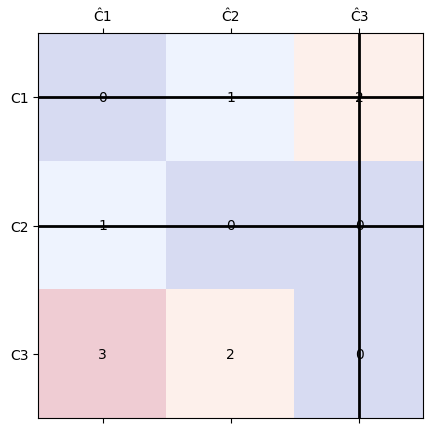

In [198]:
import matplotlib.pyplot as plt

# Updated cost matrix based on the uploaded image
cost_matrix = np.array([
    [0, 1, 2],  # C1
    [1, 0, 0],  # C2
    [3, 2, 0],  # C3
])

# Visualizing the matrix with "crossed out zeros"
def visualize_matrix_with_zeros(matrix, covered_rows, covered_cols):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(matrix, cmap="coolwarm", alpha=0.2)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            c = matrix[i, j]
            ax.text(x=j, y=i, s=str(c), va='center', ha='center')

    # Add lines to "cross out zeros"
    for row in covered_rows:
        ax.plot([-0.5, matrix.shape[1] - 0.5], [row, row], color="black", linewidth=2)
    for col in covered_cols:
        ax.plot([col, col], [-0.5, matrix.shape[0] - 0.5], color="black", linewidth=2)

    plt.xticks(range(matrix.shape[1]), [f"Ĉ{j+1}" for j in range(matrix.shape[1])])
    plt.yticks(range(matrix.shape[0]), [f"C{i+1}" for i in range(matrix.shape[0])])
    plt.grid(False)
    plt.show()

# Simulating minimum cover lines (this can be done programmatically)
covered_rows = [0, 1]  # Example: Covering row 1
covered_cols = [2]  # Example: Covering column 3

# Visualize the matrix with crossed out zeros
visualize_matrix_with_zeros(cost_matrix, covered_rows, covered_cols)


In [221]:
# Provided gradients for Cross-Entropy (CE) and Entropy (E) Loss
cross_entropy_gradients_table = np.array([
    [0.243, -0.414, 0.169],  # x1
    [-0.706, 0.452, 0.253],  # x2
    [0.254, 0.143, -0.399],  # x3
    [0.284, 0.250, -0.536],  # x4
    [0.219, -0.477, 0.257],  # x5
])

entropy_gradients_table = np.array([
    [0.082, -0.093, 0.155],  # x1
    [0.044, -0.041, 0.074],  # x2
    [0.074, 0.188, -0.098],  # x3
    [0.051, 0.077, -0.046],  # x4
    [0.103, -0.070, 0.717],  # x5
])

# Summing the gradients element-wise
summed_gradients_table = cross_entropy_gradients_table + entropy_gradients_table

# Create a DataFrame for the summed gradients
summed_gradients_df = pd.DataFrame(
    summed_gradients_table,
    columns=["dL/dy1 (Summed)", "dL/dy2 (Summed)", "dL/dy3 (Summed)"],
    index=[f"x{i+1}" for i in range(len(summed_gradients_table))]
)

# Display the results
summed_gradients_df

,dL/dy1 (Summed),dL/dy2 (Summed),dL/dy3 (Summed)
x1,0.325,-0.507,0.324
x2,-0.662,0.411,0.327
x3,0.328,0.331,-0.497
x4,0.335,0.327,-0.582
x5,0.322,-0.547,0.974


In [222]:
averaged_gradients = np.mean(summed_gradients_table, axis=0)

# Create a DataFrame for the averaged gradients
averaged_gradients_df = pd.DataFrame(
    [averaged_gradients],
    columns=["Average(dL/dy1)", "Average(dL/dy2)", "Average(dL/dy3)"],
    index=["Batch Average"]
)

averaged_gradients_df

,Average(dL/dy1),Average(dL/dy2),Average(dL/dy3)
Batch Average,0.1296,0.003,0.1092


In [225]:
# Define the given tables (partial derivatives)
dL_dy_hat = np.array([
    [0.325, -0.507, 0.324],  # x1
    [-0.661, 0.411, 0.327],  # x2
    [0.328, 0.330, -0.497],  # x3
    [0.334, 0.327, -0.582],  # x4
    [0.322, -0.546, 0.974],  # x5
])

dy_hat_dz = np.array([
    [1.0, 1.0, 0.487],  # x1
    [0.330, 0.817, 1.0],  # x2
    [0.440, 0.437, 0.458],  # x3
    [1.0, 1.0, 0.377],  # x4
    [1.0, 1.0, 0.785],  # x5
])

# Multiply the derivatives to get ∂L_total/∂z
dL_dz = dL_dy_hat * dy_hat_dz  # Element-wise multiplication

# Convert to a DataFrame for better readability
dL_dz_df = pd.DataFrame(
    dL_dz,
    columns=[f"∂L/∂z_{i+1}" for i in range(dL_dz.shape[1])],
    index=[f"x_{i+1}" for i in range(dL_dz.shape[0])]
)

print(dL_dz_df.mean())
dL_dz_df


∂L/∂z_1    0.181438
∂L/∂z_2   -0.049201
∂L/∂z_3    0.160468
dtype: float64


,∂L/∂z_1,∂L/∂z_2,∂L/∂z_3
x_1,0.32500,-0.507000,0.157788
x_2,-0.21813,0.335787,0.327000
x_3,0.14432,0.144210,-0.227626
x_4,0.33400,0.327000,-0.219414
x_5,0.32200,-0.546000,0.764590


In [226]:
# Re-import necessary libraries since the environment reset
import numpy as np
import pandas as pd

# Define the gradient matrices from the images
dL_dz = np.array([
    [0.325, -0.507, 0.157],  # x1
    [-0.218, 0.335, 0.327],  # x2
    [0.144, 0.144, -0.227],  # x3
    [0.334, 0.327, -0.219],  # x4
    [0.322, -0.546, 0.764],  # x5
])

dz_dw = np.array([
    [-0.577, -0.864, -0.629],  # x1
    [1.732, -0.890, -0.551],  # x2
    [-0.577, 1.555, 1.731],   # x3
    [-0.577, 0.199, -0.551],  # x4
    [1.715, -0.230, -0.719],  # x5
])

dz_db = np.ones((5, 3))  # Bias gradient is a constant 1 for each element (as shown in the δw row).

# Calculate ∂L/∂W (weights)
dL_dW = dL_dz * dz_dw  # Element-wise multiplication

# Calculate ∂L/∂b (biases)
dL_db = dL_dz * dz_db  # Element-wise multiplication

# Average gradients for weights and biases across all samples
dL_dW_avg = np.mean(dL_dW, axis=0)
dL_db_avg = np.mean(dL_db, axis=0)

# Convert to DataFrames for better readability
dL_dW_df = pd.DataFrame(
    dL_dW, columns=[f"∂L/∂w_{i+1}" for i in range(dL_dW.shape[1])], index=[f"x_{i+1}" for i in range(dL_dW.shape[0])]
)
dL_db_df = pd.DataFrame(
    dL_db, columns=[f"∂L/∂b_{i+1}" for i in range(dL_db.shape[1])], index=[f"x_{i+1}" for i in range(dL_db.shape[0])]
)


dL_dW_avg, dL_db_avg


(array([-0.0577354,  0.1108942, -0.2201028]),
 array([ 0.1814, -0.0494,  0.1604]))

In [230]:
# Compute partial derivatives with respect to f (dL/df)
# Formula: dL/df = W^T * dL/dz
w_matrix = np.array([
    [0.12, -0.45, 0.88],
    [-0.61, 0.29, -0.78],
    [0.33, -0.72, 0.90]
])

# Compute dL/df using matrix multiplication
dL_df = np.dot(dL_dz, w_matrix.T)

# Prepare dataframe for display
dL_df_df = pd.DataFrame(dL_df, columns=["f1", "f2", "f3"], index=[f"x{i+1}" for i in range(dL_dz.shape[0])])

# Display the results for the user
dL_df_df

,f1,f2,f3
x1,0.40531,-0.46774,0.61359
x2,0.11085,-0.02493,-0.01884
x3,-0.24728,0.13098,-0.26046
x4,-0.29979,0.06191,-0.32232
x5,0.95666,-0.95068,1.18698


In [239]:
import numpy as np
import pandas as pd

# Original weights
weights = np.array([
    [0.12, -0.45, 0.88],
    [-0.61, 0.29, -0.78],
    [0.33, -0.72, 0.90]
])

# Gradients
gradients = np.array([-0.057, 0.110, -0.220])

# Learning rate (alpha)
alpha = 1

# Update rule: w_new = w_old - alpha * gradient
updated_weights = weights - alpha * gradients

# Creating a DataFrame for better visualization
weights_df = pd.DataFrame(updated_weights, columns=["w1", "w2", "w3"], index=["f1", "f2", "f3"])

weights_df

,w1,w2,w3
f1,0.177,-0.56,1.10
f2,-0.553,0.18,-0.56
f3,0.387,-0.83,1.12


In [278]:
import numpy as np
import pandas as pd

# Initial feature values
f = np.array([
    [-0.577, -0.864, -0.629],
    [1.732, -0.890, -0.551],
    [-0.577, 1.555, 1.731],
    [-0.577, 0.199, -0.551],
    [1.715, -0.230, -0.719]
])

# Gradient average for features
grad_f = np.array([0.185, -0.250, 0.239])

# Update rule for features
learning_rate = 1
f_new = f - learning_rate * grad_f

# Display updated feature matrix
f_df = pd.DataFrame(f_new, columns=["f1", "f2", "f3"], index=[f"x{i}" for i in range(1, 6)])
print("Updated Features (f):")
print(f_df)

# Initial bias values
b = np.array([0.15, -0.24, 0.31])

# Gradient average for biases
grad_b = np.array([0.181, -0.049, 0.160])

# Update rule for biases
b_new = b - learning_rate * grad_b

# Display updated biases
b_df = pd.DataFrame([b_new], columns=["b1", "b2", "b3"], index=["Updated Bias"])
print("\nUpdated Biases (b):")
print(b_df)


Updated Features (f):
       f1     f2     f3
x1 -0.762 -0.614 -0.868
x2  1.547 -0.640 -0.790
x3 -0.762  1.805  1.492
x4 -0.762  0.449 -0.790
x5  1.530  0.020 -0.958

Updated Biases (b):
                 b1     b2    b3
Updated Bias -0.031 -0.191  0.15


In [5]:
# Given data from the table
import numpy as np

# Derivatives of L_T
delta_L_T = np.array([-0.125, 0.450, 0.231])

# Derivatives of L_D
delta_L_D = np.array([0.098, -0.343, -0.344])

# Lambda value
_lambda = -0.25

# Formula: delta_L_T + lambda * delta_L_D
final_values = delta_L_T + _lambda * delta_L_D

# Compute the averages
average = np.mean(final_values)

final_values, average


(array([-0.1495 ,  0.53575,  0.317  ]), np.float64(0.23441666666666672))

In [6]:
# Initial weights from the table
weights = np.array([
    [0.127, -0.452, 0.889],
    [-0.614, 0.294, -0.785],
    [0.338, -0.726, 0.904]
])

# Gradients from the calculated row
gradients = np.array([-0.1495, 0.53575, 0.317])

# Learning rate
learning_rate = 1

# Update weights: w_new = w - alpha * gradient
updated_weights = weights - learning_rate * gradients

updated_weights


array([[ 0.2765 , -0.98775,  0.572  ],
       [-0.4645 , -0.24175, -1.102  ],
       [ 0.4875 , -1.26175,  0.587  ]])

In [8]:
import numpy as np

# Random gradients for δL_T/δb and δL_D/δb
np.random.seed(42)  # For reproducibility
delta_L_T_b = np.random.uniform(-1, 1, 3)  # Random values for δL_T/δb
delta_L_D_b = np.random.uniform(-1, 1, 3)  # Random values for δL_D/δb

# Lambda value
_lambda = -0.25

# Initial biases
biases = np.array([0.15, -0.24, 0.31])

# Compute weighted gradient: δL_T/δb + λ * δL_D/δb
gradients_b = delta_L_T_b + _lambda * delta_L_D_b

# Update biases using gradient descent
learning_rate = 1
updated_biases = biases - learning_rate * gradients_b

# Calculate average (μ) of gradients
average_gradient = np.mean(gradients_b)

# Display results
print("Initial Biases (b):", biases)
print("δL_T/δb:", delta_L_T_b)
print("δL_D/δb:", delta_L_D_b)
print("Weighted Gradients:", gradients_b)
print("Updated Biases (b):", updated_biases)
print("Average Gradient (μ):", average_gradient)


Initial Biases (b): [ 0.15 -0.24  0.31]
δL_T/δb: [-0.25091976  0.90142861  0.46398788]
δL_D/δb: [ 0.19731697 -0.68796272 -0.68801096]
Weighted Gradients: [-0.300249    1.07341929  0.63599062]
Updated Biases (b): [ 0.450249   -1.31341929 -0.32599062]
Average Gradient (μ): 0.46972030388317654


In [27]:
# Assign the initial f values from the table
f_values = np.array([
    [-0.577, -0.864, -0.629],
    [1.732, -0.890, -0.551],
    [-0.577, 1.555, 1.731],
    [-0.577, 0.199, -0.551],
    [1.715, -0.230, -0.719]
])

# Random gradients for δL_T/δf and δL_D/δf
np.random.seed(42)  # For reproducibility
delta_L_T_f = np.random.uniform(-1, 1, (5, 3))  # Random values for δL_T/δf
delta_L_D_f = np.random.uniform(-1, 1, (5, 3))  # Random values for δL_D/δf
print("LT")
print(delta_L_T_f.mean(axis=0))
print("LD")
print(delta_L_D_f.mean(axis=0))

# Lambda value
_lambda = -0.25

# Compute weighted gradient: δL_T/δf + λ * δL_D/δf
gradients_f = delta_L_T_f + _lambda * delta_L_D_f
print("GradF")
print(gradients_f.mean(axis=0))

# Update f values using gradient descent
learning_rate = 1
# Calculate averages (μ) of gradients for each column
average_gradients = np.mean(gradients_f, axis=0)
updated_f_values = f_values - learning_rate * average_gradients
print("updatedF")
print(updated_f_values)


# Display results
import pandas as pd

df_results = pd.DataFrame({
    "Initial f": f_values.flatten(),
    "δL_T/δf": delta_L_T_f.flatten(),
    "δL_D/δf": delta_L_D_f.flatten(),
    "Weighted Gradient": gradients_f.flatten(),
    "Updated f": updated_f_values.flatten()
})

# Display the calculated averages
average_gradients, df_results


LT
[ 0.02871897 -0.11766692  0.05633532]
LD
[-0.30994088 -0.09391738 -0.30036185]
GradF
[ 0.10620419 -0.09418758  0.13142578]
updatedF
[[-0.68320419 -0.76981242 -0.76042578]
 [ 1.62579581 -0.79581242 -0.68242578]
 [-0.68320419  1.64918758  1.59957422]
 [-0.68320419  0.29318758 -0.68242578]
 [ 1.60879581 -0.13581242 -0.85042578]]


(array([ 0.10620419, -0.09418758,  0.13142578]),
     Initial f   δL_T/δf   δL_D/δf  Weighted Gradient  Updated f
 0      -0.577 -0.250920 -0.633191          -0.092622  -0.683204
 1      -0.864  0.901429 -0.391516           0.999307  -0.769812
 2      -0.629  0.463988  0.049513           0.451610  -0.760426
 3       1.732  0.197317 -0.136110           0.231344   1.625796
 4      -0.890 -0.687963 -0.417542          -0.583577  -0.795812
 5      -0.551 -0.688011  0.223706          -0.743937  -0.682426
 6      -0.577 -0.883833 -0.721012          -0.703580  -0.683204
 7       1.555  0.732352 -0.415711           0.836280   1.649188
 8       1.731  0.202230 -0.267276           0.269049   1.599574
 9      -0.577  0.416145 -0.087860           0.438110  -0.683204
 10      0.199 -0.958831  0.570352          -1.101419   0.293188
 11     -0.551  0.939820 -0.600652           1.089983  -0.682426
 12      1.715  0.664885  0.028469           0.657768   1.608796
 13     -0.230 -0.575322  0.184829       

In [1]:
import numpy as np
import pandas as pd

# Data from z and a tables
z_values = np.array([
    [0.384, 1.312, -0.718],
    [-1.106, -0.201, 2.622],
    [-0.820, -0.827, -0.780],
    [1.776, 2.672, -0.975],
    [0.632, 1.242, -0.394]
])

a_values = np.array([
    [-0.327, 0.583, 0.814],
    [0.494, 1.801, 0.285],
    [-1.395, 0.692, 1.746],
    [-0.410, 0.653, 0.526],
    [0.434, 0.465, 0.696]
])

# Calculate mean and standard deviation
mu_z = np.mean(z_values, axis=1)
sigma_z = np.std(z_values, axis=1, ddof=0)
mu_a = np.mean(a_values, axis=1)
sigma_a = np.std(a_values, axis=1, ddof=0)

# Combine into a DataFrame
results_fixed = pd.DataFrame({
    "μ_z": mu_z,
    "σ_z": sigma_z,
    "μ_a": mu_a,
    "σ_a": sigma_a
}, index=[f"x{i+1}" for i in range(len(z_values))])

# Display the DataFrame
print(results_fixed)


         μ_z       σ_z       μ_a       σ_a
x1  0.326000  0.829758  0.356667  0.492538
x2  0.438333  1.587673  0.860000  0.670836
x3 -0.809000  0.020704  0.347667  1.305219
x4  1.157667  1.551753  0.256333  0.474013
x5  0.493333  0.675053  0.531667  0.116888


In [ ]:
import numpy as np

def cover_zeros(matrix):
    """
    Determines the minimum number of rows and columns to cover all zeros
    in a square matrix using the Hungarian method.

    Args:
        matrix (numpy.ndarray): Input square matrix.

    Returns:
        tuple: List of selected rows, List of selected columns
    """
    # Convert the matrix into a binary matrix (0 if zero, 1 otherwise)
    binary_matrix = (matrix == 0).astype(int)

    # Step 1: Initialize row and column covers
    row_cover = np.zeros(matrix.shape[0], dtype=bool)
    col_cover = np.zeros(matrix.shape[1], dtype=bool)

    while True:
        # Find rows with exactly one uncovered zero
        for i, row in enumerate(binary_matrix):
            if np.sum(row * (~col_cover)) == 1 and not row_cover[i]:
                # Cover the row and uncover the column of the zero
                row_cover[i] = True
                zero_col = np.where((row * (~col_cover)) == 1)[0][0]
                col_cover[zero_col] = False

        # Find columns with exactly one uncovered zero
        for j, col in enumerate(binary_matrix.T):
            if np.sum(col * (~row_cover)) == 1 and not col_cover[j]:
                # Cover the column and uncover the row of the zero
                col_cover[j] = True
                zero_row = np.where((col * (~row_cover)) == 1)[0][0]
                row_cover[zero_row] = False

        # Stop when no more rows/columns can be covered
        if not (np.sum(~row_cover) + np.sum(~col_cover)):
            break

    # Return the selected rows and columns
    selected_rows = np.where(row_cover)[0].tolist()
    selected_columns = np.where(col_cover)[0].tolist()
    return selected_rows, selected_columns


# Example Usage
matrix = np.array([
    [0, 1, 2],
    [1, 0, 0],
    [3, 2, 0]
])

selected_rows, selected_columns = cover_zeros(matrix)

print("Selected Rows:", selected_rows)
print("Selected Columns:", selected_columns)


In [2]:
import numpy as np
W = np.array([
    0.12, -0.45, -.88,
    -0.61, 0.29, -0.78,
    0.33, -0.72, 0.90
])



In [3]:
import numpy as np

# Define the ELU activation function and its derivative
def elu(x, alpha=1):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1):
    return np.where(x >= 0, 1, alpha * np.exp(x))

# Define the softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))  # Numerical stability
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Define the cross-entropy loss
def cross_entropy_loss(y_true, y_pred):
    n = y_true.shape[0]
    loss = -np.sum(y_true * np.log(y_pred + 1e-15)) / n  # Add epsilon for numerical stability
    return loss

# Forward pass
def forward_pass(F, W, b, y_true):
    # Linear transformation: Z = WF.T + b
    Z = np.dot(W, F.T) + b.reshape(-1, 1)

    # Apply ELU activation: A = ELU(Z)
    A = elu(Z)

    # Apply softmax: Y_hat = softmax(A.T)
    Y_hat = softmax(A.T)

    # Compute loss: L = cross-entropy(y_true, Y_hat)
    loss = cross_entropy_loss(y_true, Y_hat)

    return Z, A, Y_hat, loss

# Backward pass
def backward_pass(F, W, b, Z, A, Y_hat, y_true):
    # Gradient w.r.t. softmax input (A)
    dA = Y_hat - y_true  # Shape: (5, 3)

    # Gradient w.r.t. ELU input (Z)
    dZ = dA.T * elu_derivative(Z)  # Shape: (3, 5)

    # Gradient w.r.t. weights (W)
    dW = np.dot(dZ, F)  # Shape: (3, 3)

    # Gradient w.r.t. biases (b)
    db = np.sum(dZ, axis=1)  # Shape: (3,)

    # Gradient w.r.t. inputs (F)
    dF = np.dot(dZ.T, W)  # Shape: (5, 3)

    return dW, db, dF

# Initialize data
F = np.array([
    [-0.577, -0.864, -0.629],
    [1.732, -0.890, -0.551],
    [-0.577, 1.555, 1.731],
    [-0.577, 0.199, -0.551],
    [1.715, -0.230, -0.719]
])  # Shape: (5, 3)

W = np.array([
    [0.12, -0.45, 0.88],
    [-0.61, 0.29, -0.78],
    [0.33, -0.72, 0.90]
])  # Shape: (3, 3)

b = np.array([0.15, -0.24, 0.31])  # Shape: (3,)

y_true = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0],
    [0, 1, 0]
])  # Shape: (5, 3)

# Perform forward pass
Z, A, Y_hat, loss = forward_pass(F, W, b, y_true)

# Perform backward pass
dW, db, dF = backward_pass(F, W, b, Z, A, Y_hat, y_true)

# Display results
print("Forward Pass:")
print(f"Z (Linear Output):\n{Z}")
print(f"A (ELU Output):\n{A}")
print(f"Y_hat (Softmax Output):\n{Y_hat}")
print(f"Loss: {loss}\n")

print("Backward Pass:")
print(f"dW (Gradient w.r.t. Weights):\n{dW}")
print(f"db (Gradient w.r.t. Biases):\n{db}")
print(f"dF (Gradient w.r.t. Inputs):\n{dF}")


Forward Pass:
Z (Linear Output):
[[-0.08396  0.27346  0.90429 -0.49367 -0.17342]
 [ 0.35203 -1.12484 -0.78726  0.59946 -0.79203]
 [ 0.17557  1.02646  0.55789 -0.51959  0.39445]]
A (ELU Output):
[[-0.08053197  0.27346     0.90429    -0.38961782 -0.15921559]
 [ 0.35203    -0.67529558 -0.54490996  0.59946    -0.54707558]
 [ 0.17557     1.02646     0.55789    -0.40523565  0.39445   ]]
Y_hat (Softmax Output):
[[0.26088644 0.40207843 0.33703513]
 [0.28485296 0.1103015  0.60484554]
 [0.51493636 0.12088544 0.3641782 ]
 [0.21398351 0.57534898 0.21066751]
 [0.29255802 0.19850276 0.50893922]]
Loss: 1.543425674830464

Backward Pass:
dW (Gradient w.r.t. Weights):
[[ 1.28705143  0.98232446  1.24935895]
 [-1.71864967  0.19325038 -0.05450824]
 [ 2.02052647 -1.91033559 -2.08083876]]
db (Gradient w.r.t. Biases):
[-0.11359421  0.38053446  0.94029562]
dF (Gradient w.r.t. Inputs):
[[-0.21559721  0.17975353 -0.6083299 ]
 [ 0.41000369 -0.64745044  1.02036503]
 [-0.18158722  0.24202433 -0.16200636]
 [-0.36718

In [15]:
import numpy as np

# Data
delta_Z = np.array([
    [ 0.325, -0.507,  0.157],
    [-0.218,  0.335,  0.327],
    [ 0.144,  0.144, -0.227],
    [ 0.334,  0.327, -0.219],
    [ 0.322, -0.546,  0.764]
])
F = np.array([
    [-0.577, -0.864, -0.629],
    [ 1.732, -0.890, -0.551],
    [-0.577,  1.555,  1.731],
    [-0.577,  0.199, -0.551],
    [ 1.715, -0.230, -0.719]
])

W = np.array([
    [ 0.12, -0.45,  0.88],
    [-0.61,  0.29, -0.78],
    [ 0.33, -0.72,  0.90]
])

print(W.T)

b = np.array([0.15, -0.24, 0.31])

# Gradients
# 1. Gradient w.r.t. Bias (b)
db = np.sum(delta_Z, axis=0)

# 2. Gradient w.r.t. Weights (W)
dW = delta_Z.T @ F

# 3. Gradient w.r.t. Inputs (F)
dF = delta_Z @ W

# Results
# print("Gradient w.r.t. Bias (db):\n", db)
# print("\nGradient w.r.t. Weights (dW):\n", dW)
print("\nGradient w.r.t. Inputs (dF):\n", dF)
print(dF.shape)
print(dF.mean(axis=0))


[[ 0.12 -0.61  0.33]
 [-0.45  0.29 -0.72]
 [ 0.88 -0.78  0.9 ]]

Gradient w.r.t. Inputs (dF):
 [[ 0.40008 -0.40632  0.82276]
 [-0.1226  -0.04019 -0.15884]
 [-0.14547  0.1404  -0.1899 ]
 [-0.23166  0.10221 -0.15824]
 [ 0.62382 -0.85332  1.39684]]
(5, 3)
[ 0.104834 -0.211444  0.342524]
